# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [20]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
# Create two new dataframes
north_callcenter_df= pd.read_csv("NorthCallCenter.csv")
south_callcenter_df = pd.read_csv("SouthCallCenter.csv")

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [21]:
# EDA Question 1A solution below:
print("Number of Reps in North branch: ") 
len(north_callcenter_df["Rep ID"].unique())

Number of Reps in North branch: 


9

#### EDA Question 1B:  How many reps are in the South branch?  

In [22]:
# EDA Question 1B solution Below:
print("Number of Reps in South branch: ") 
len(south_callcenter_df["Rep ID"].unique()) 

Number of Reps in South branch: 


11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [23]:
# EDA Question 2A solution Below:
north_callcenter_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean().round(2)

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [24]:
# EDA Question 2B solution Below:
south_callcenter_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean().round(2)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [25]:
# EDA Question 3 solution Below:
combined_df = pd.concat([north_callcenter_df,south_callcenter_df],axis=0)
combined_df.groupby(["Time Block"]).agg({'Calls':['sum']})


,Calls
,sum
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11
  
- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [26]:
# Question 1 solution below
print("North Callcenter Missing data ")
missing_north_df = north_callcenter_df.isna().sum()
print(missing_north_df)
print("South Callcenter Missing data")
missing_south_df = south_callcenter_df.isna().sum()
print(missing_south_df)

North Callcenter Missing data 
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
South Callcenter Missing data
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


#### Record your answer below:

> Your Answer:  "Incoming Wait Time " column is null in 163 records for North CallCenter and 188 records for South CallCenter. It doesnt need to be rectified because incoming wait time is not applicable for outgoing call records. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [27]:
# Cleaning Question 2 solution below:
north_callcenter_df["Sale"].unique()
north_callcenter_df['Sale'].str.rstrip().unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: Sale column in the North data set has two separate values for YES due to incorrect data entry - one without any space and one with trailing space. This can be rectified by invoking the rstrip() function to strip the trailing space.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [28]:
# Cleaning Question 3 solution below:
north_callcenter_df.duplicated().sum()
south_callcenter_df.duplicated().sum()

np.int64(0)

##### Record your answer below:
> Your Answer: There are no duplicates in both the datasets.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [29]:
# Cleaning Question 4 solution below:
north_callcenter_df.drop(['Sale'], axis=1,inplace = True)
south_callcenter_df.drop(['Sale'], axis=1, inplace = True)

##### Record your answer below:
> Your Answer: Sale column seems to be unnecessary in context of this particular analysis of identifying the efficiency of the call center.  It can be handled by removing the column from the analysis by using the dataFrame.drop().

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [40]:
# Create dataframe for the entire company named df
df = pd.concat([north_callcenter_df,south_callcenter_df],axis=0,ignore_index=True)
df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [41]:
# Manipulation Question solution below:
grouped_df = df.groupby(['Branch', 'Rep ID']).sum()
sorted_df = grouped_df.sort_values(['Branch', 'Calls'], ascending=[True, False])
sorted_df.groupby('Branch').head()

Unnamed: 0                                       Call Purpose  \
Branch Rep ID                                                                  
North  Brent         4840  ComplaintSales SupportProduct SupportComplaint...   
       Lilly         3375  Product SupportSales SupportSales SupportProdu...   
       Duke          2999  Product SupportProduct SupportComplaintComplai...   
       Todd          4252  Sales SupportProduct SupportSales SupportSales...   
       Joe           3178  Product SupportProduct SupportSales SupportSal...   
South  Eric          5039  Sales SupportComplaintSales SupportSales Suppo...   
       Randy         4576  Product SupportProduct SupportComplaintComplai...   
       Sandy         4694  Sales SupportProduct SupportProduct SupportCom...   
       Helga         5236  Product SupportComplaintComplaintSales Support...   
       George        4620  Product SupportProduct SupportProduct SupportC...   

                                                      Time Block  \
Branch Rep ID                                                      
North  Brent   9:00 AM4:00 PM12:00 PM12:00 PM3:00 PM1:00 PM10...   
       Lilly   2:00 PM10:00 AM11:00 AM2:00 PM10:00 AM12:00 PM...   
       Duke    2:00 PM3:00 PM9:00 AM1:00 PM10:00 AM12:00 PM10...   
       Todd    11:00 AM4:00 PM10:00 AM12:00 PM12:00 PM2:00 PM...   
       Joe     2:00 PM4:00 PM11:00 AM12:00 PM12:00 PM10:00 AM...   
South  Eric    10:00 AM1:00 PM10:00 AM12:00 PM2:00 PM3:00 PM3...   
       Randy   2:00 PM5:00 PM11:00 AM12:00 PM10:00 AM1:00 PM3...   
       Sandy   12:00 PM11:00 AM12:00 PM1:00 PM12:00 PM10:00 A...   
       Helga   3:00 PM3:00 PM5:00 PM10:00 AM11:00 AM3:00 PM11...   
       George  3:00 PM4:00 PM2:00 PM12:00 PM10:00 AM4:00 PM3:...   

                                            Incoming or Outgoing  \
Branch Rep ID                                                      
North  Brent   IncomingIncomingIncomingIncomingIncomingIncomi...   
       Lilly   IncomingIncomingIncomingIncomingIncomingIncomi...   
       Duke    IncomingIncomingIncomingIncomingIncomingIncomi...   
       Todd    IncomingIncomingIncomingIncomingIncomingIncomi...   
       Joe     IncomingIncomingIncomingIncomingIncomingIncomi...   
South  Eric    IncomingIncomingIncomingIncomingIncomingIncomi...   
       Randy   IncomingIncomingIncomingIncomingIncomingIncomi...   
       Sandy   IncomingIncomingIncomingIncomingIncomingIncomi...   
       Helga   IncomingIncomingIncomingIncomingIncomingIncomi...   
       George  IncomingIncomingIncomingIncomingIncomingIncomi...   

                                               Queue  Lost Call  Abandoned  \
Branch Rep ID                                                                
North  Brent   BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB          0          1   
       Lilly          BBBBBBBBBBBBBBBBBBBBBBBBBBBBBB          0          2   
       Duke            BBBBBBBBBBBBBBBBBBBBBBBBBBBBB          2          0   
       Todd            BBBBBBBBBBBBBBBBBBBBBBBBBBBBB          1          0   
       Joe                AAAAAAAAAAAAAAAAAAAAAAAAAA          0          0   
South  Eric      CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC          0          0   
       Randy       DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD          3          1   
       Sandy        CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC          1          0   
       Helga         DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD          0          2   
       George          DDDDDDDDDDDDDDDDDDDDDDDDDDDDD          0          0   

               Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
Branch Rep ID                                                        
North  Brent            362                 71                17.0   
       Lilly            307                 59                37.0   
       Duke             292                 56                39.0   
       Todd             296                 58                21.0   
       Joe              256                 49                3

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [32]:
# Manipulation Question 2 solution below:
abandoned_north_df= north_callcenter_df['Abandoned'].mean().round(4) * 100
print(abandoned_north_df)
abandoned_south_df = south_callcenter_df['Abandoned'].mean().round(4) * 100
print(abandoned_south_df)
abandoned_df=df['Abandoned'].mean().round(4) * 100
print(abandoned_df)

2.86
1.27
1.97


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes South CallCenter abandonment rate is 1.27% which falls out of the optimal range of 2-5%

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [33]:
# Manipulation Question 3 solution below:
ndf_within_2_seconds = north_callcenter_df[north_callcenter_df['Incoming Wait Time'] <= 2 ]
ndf_incoming = north_callcenter_df[north_callcenter_df["Incoming or Outgoing"] == 'Incoming']
print("number of calls(North)",len( ndf_within_2_seconds))
npercentage_of_calls = (len(ndf_within_2_seconds) / len(ndf_incoming)) * 100
print("North Branch Percentage",npercentage_of_calls)

sdf_within_2_seconds = south_callcenter_df[south_callcenter_df['Incoming Wait Time'] <= 2 ]
sdf_incoming = south_callcenter_df[south_callcenter_df["Incoming or Outgoing"] == 'Incoming']
print("number of calls(south)",len( sdf_within_2_seconds))
spercentage_of_calls = (len(sdf_within_2_seconds) / len(sdf_incoming)) * 100
print("South Branch Percentage",spercentage_of_calls)

df_within_2_seconds = df[df['Incoming Wait Time'] <= 2 ]
df_incoming = df[df["Incoming or Outgoing"] == 'Incoming']
print("number of calls(Company wide)",len( df_within_2_seconds))
percentage_of_calls = (len(df_within_2_seconds) / len(df_incoming)) * 100
print(" Company wide Percentage",percentage_of_calls)



number of calls(North) 33
North Branch Percentage 40.243902439024396
number of calls(south) 48
South Branch Percentage 38.095238095238095
number of calls(Company wide) 81
 Company wide Percentage 38.94230769230769


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% (33 calls)
- South Branch = 38.10% (48 calls)
- Company Wide = 38.94% (81 calls)

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [34]:
# Manipulation Question 4 solution below:
naverage_speed_df= north_callcenter_df['Incoming Wait Time'].mean().round(2)
print(naverage_speed_df)
saverage_speed_df = south_callcenter_df['Incoming Wait Time'].mean().round(2)
print(saverage_speed_df)
average_speed_df=df['Incoming Wait Time'].mean().round(2)
print(average_speed_df)

3.05
3.0
3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\Shanthi\AppData\Local\Temp\ipykernel_19880\3324712708.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


Text(0, 0.5, 'Abandonment rates')

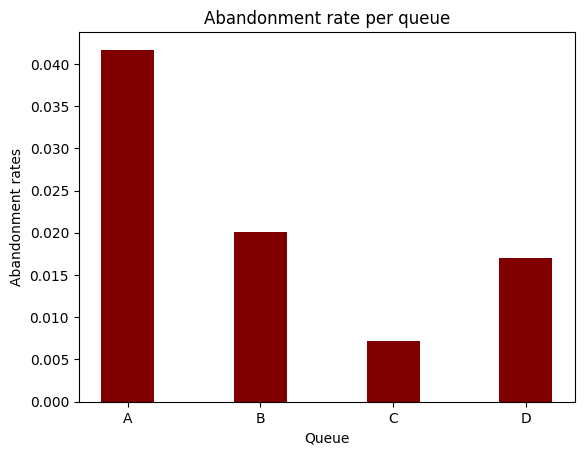

In [35]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style 
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
plt.bar(x=abandonment_rates.keys(), height=abandonment_rates.values(),width=.4, color ='maroon')
plt.title("Abandonment rate per queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment rates")

##### Record your answer below:

> Chart style you chose and why:
>
>        I used the Bar chart for this question.
>        Reason
>               Using Bar chart we can easily visualize the abandonment rate across various queues and quickly identify which queues have higher or lower average abandonment rates.

   Rep ID  Incoming Wait Time  Calls_x  Calls_y  Service Level %
0  Amanda            2.400000        3        5        60.000000
1    Andy            3.600000        3       10        30.000000
2   Brent            2.125000        6        8        75.000000
3     Cam            2.909091        5       11        45.454545
4    Duke            2.785714        6       14        42.857143
5     Joe            3.600000        2       10        20.000000
6   Lilly            3.083333        4       12        33.333333
7    Todd            3.500000        2        6        33.333333
8  Xander            3.333333        2        6        33.333333


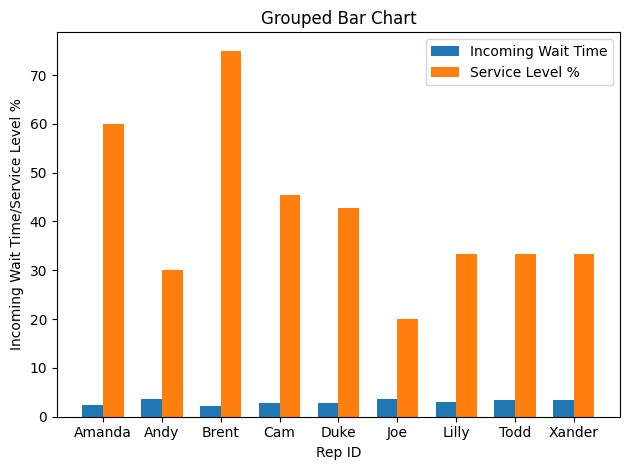

In [86]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
north_plt = north_callcenter_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_callcenter_df[north_callcenter_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum().reset_index()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_callcenter_df[north_callcenter_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum().reset_index() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

grouped_bar_df = pd.merge(north_plt, service_level, on="Rep ID")
print(grouped_bar_df)

#Your Code Here:

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(grouped_bar_df['Rep ID']))

# Create the grouped bar chart
plt.bar(index, grouped_bar_df['Incoming Wait Time'], bar_width, label='Incoming Wait Time')
plt.bar(index + bar_width, grouped_bar_df['Service Level %'], bar_width, label='Service Level %')

# Add labels and titles
plt.xlabel('Rep ID')
plt.ylabel('Incoming Wait Time/Service Level %')
plt.title('Grouped Bar Chart')
plt.xticks(index + bar_width / 2, grouped_bar_df['Rep ID'])

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose
>        I chose the grouped bar chart for this use case
>        Reasons
>              Grouped bar chart is very useful for providing a clear, side-by-side comparisons of multiple metrics (Average incoming wait time, Service level %) across a set of categories (reps)

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

      Call Purpose Incoming or Outgoing  count
0        Complaint             Incoming     51
1  Product Support             Outgoing    228
2  Product Support             Incoming     82
3    Sales Support             Outgoing    123
4    Sales Support             Incoming     75
Incoming or Outgoing  Incoming  Outgoing
Call Purpose                            
Complaint                 51.0       0.0
Product Support           82.0     228.0
Sales Support             75.0     123.0


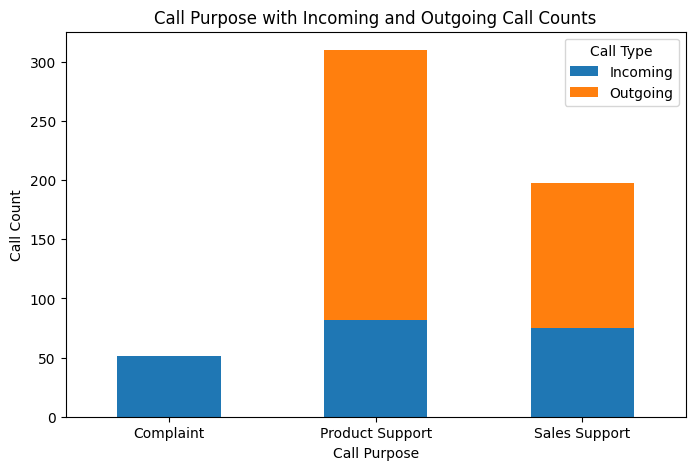

In [91]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
call_type = ["Incoming", "Outgoing"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
#print(call_purpose)
#print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
#print(complaints)
#print(sales_support)
#print(product_support)

#Your Code Here:
tdf = purpose_counts.reset_index()
print(tdf)

# Pivot the data to have 'Incoming' and 'Outgoing' as separate columns
pivot_df = tdf.pivot(index='Call Purpose', columns='Incoming or Outgoing', values='count').fillna(0)
print(pivot_df)

# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 5))

# Add labels and title
plt.xlabel('Call Purpose')
plt.ylabel('Call Count')
plt.title('Call Purpose with Incoming and Outgoing Call Counts')
plt.legend(title='Call Type')
plt.xticks(rotation=0)

# Show the plot
plt.show()

##### Record your answer below:

> Chart style you chose and why:
>      I chose the stacked bar chart for this use case
>      Reasons
>          Stacked bar chart effectively combines total values and sub-category comparisons (incoming vs. outgoing), making it a perfect fit to visualize the incoming/outgoing/total call counts

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer:
>           South is operating more efficiently based on the analysis.
>                 Eventhough the service level of North branch is higher than the South, the average abandonment rate and the average speed to answer are higher than the South branch.
>
> Branch     Average Abandonment Rate     Service Level     Average Speed of Answer
>  North             2.86%                   40.24%                3.05
>  South             1.27%                   38.10%                3.00
> 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer:
>       North branch would be benefitted from the extra help based on the analysis
>             North branch has less number of reps compared to South branch
>             North branch has higher incoming wait time compared to South branch
>       With extra help, North branch would be able to take more calls and also reduce the incoming wait time
> 
> Branch     Total Reps     Total Calls   Avg calls per Rep   Incoming wait time
>  North          9             245             27.22             3.05
>  South          11            314             28.54             3.00


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer:
>       Call Outcome: Result of the call (e.g., resolved, unresolved, escalated).
>       Satisfaction Rating: Customer satisfaction score.
>       Resolution Time: Time taken to resolve the issue.
> Having these 3 additional column would have helped the analysis further.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: